In [19]:
import torch
import torch
def multiply(pose_a, pose_b):
    """Multiply two pose matrices, A @ B.

    Args:
        pose_a: Left pose matrix, usually a transformation applied to the right.
        pose_b: Right pose matrix, usually a camera pose that will be transformed by pose_a.

    Returns:
        Camera pose matrix where pose_a was applied to pose_b.
    """
    R1, t1 = pose_a[..., :3, :3], pose_a[..., :3, 3:]
    R2, t2 = pose_b[..., :3, :3], pose_b[..., :3, 3:]
    R = R1.matmul(R2)
    t = t1 + R1.matmul(t2)
    return torch.cat([R, t], dim=-1)

a = torch.rand(3,4)
b = torch.rand(3,4)
row = torch.tensor([[0, 0, 0, 1]])
a2 = torch.cat((a, row), dim=0)
b2 = torch.cat((b, row), dim=0)
output = multiply(a,b) 
output = torch.cat((output, row), dim=0)
output == a2 @ b2

tensor([[ True,  True,  True,  True],
        [ True,  True,  True, False],
        [ True, False,  True,  True],
        [ True,  True,  True,  True]])

In [20]:
output

tensor([[0.9596, 1.5171, 0.5742, 1.8926],
        [0.4247, 0.9731, 0.1682, 0.9876],
        [0.7590, 0.8794, 0.5583, 0.8981],
        [0.0000, 0.0000, 0.0000, 1.0000]])

In [21]:
a2 @ b2

tensor([[0.9596, 1.5171, 0.5742, 1.8926],
        [0.4247, 0.9731, 0.1682, 0.9876],
        [0.7590, 0.8794, 0.5583, 0.8981],
        [0.0000, 0.0000, 0.0000, 1.0000]])

In [2]:
from torchmetrics.functional import structural_similarity_index_measure
from torchmetrics.image import PeakSignalNoiseRatio
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity
import re 
import json 
import os
from PIL import Image, ImageDraw, ImageFont
from torchvision.transforms import ToTensor

psnr_metric = PeakSignalNoiseRatio(data_range=1.0)
lpips_metric = LearnedPerceptualImagePatchSimilarity()
ssim_metric = structural_similarity_index_measure

results_path = 'C:\Stuff\Dataset-creation\jsons_lego'

def add_text_to_image(input_image_path, output_image_path, text):
    image = Image.open(input_image_path)
    width, height = image.size
    draw = ImageDraw.Draw(image)
    font_size = 150
    font = ImageFont.truetype("arial.ttf", font_size)

    text_width, text_height = 200, 200
    x_position = width - text_width - 600
    y_position = height - text_height + 40

    text_color = (255, 0, 0)
    draw.text((x_position, y_position), text, font=font, fill=text_color)

    image.save(output_image_path)

In [6]:
# from PIL import Image
# import os
# import shutil

# renders_folder = "renders_nerfacto_lego_opt_off"
# subfolders = os.listdir(renders_folder)
# if subfolders:
#     first_subfolder = subfolders[0]
#     subfolder_path = os.path.join(renders_folder, first_subfolder)
#     new_folder = "lego_original"
#     os.makedirs(new_folder, exist_ok=True)

#     for filename in os.listdir(subfolder_path):
#         if "img.jpg" in filename:
#             image_path = os.path.join(subfolder_path, filename)
#             original_image = Image.open(image_path)
#             original_width, original_height = original_image.size
#             left = 0  # Start from the left edge of the image
#             top = 0  # Start from the top edge of the image
#             right = original_width // 2  # Take the left half of the image
#             bottom = original_height  # Extend to the bottom edge of the image
#             cropped_image = original_image.crop((left, top, right, bottom))
#             new_filename = filename
#             new_file_path = os.path.join(new_folder, new_filename)
#             cropped_image.save(new_file_path)
#             original_image.close()

#     print("Left parts of images saved to 'lego original' folder.")
# else:
#     print("No subfolders found in 'renders_nerfacto_lego_opt_off" folder.")


Left parts of images saved to 'lego original' folder.


In [3]:
PATH_ORIGINAL_IMAGES = "C:\Stuff\Results\lego_original"
PATH_RENDERS = r"C:\Stuff\Results\renders\renders_ngp_lego_opt_off"

for folder_path in os.listdir(PATH_RENDERS)[:]:
    for filename in os.listdir(os.path.join(PATH_RENDERS, folder_path)):
        if filename.lower().endswith('img.jpg') and 'crop' not in filename:
            file_path = os.path.join(PATH_RENDERS, folder_path, filename)
            original_image = Image.open(file_path)
            original_width, original_height = original_image.size
            left = original_width / 2  # Start from the middle of the image to get the right half
            top = 0  # Start from the top edge of the image
            right = original_width  # Extend to the right edge of the image
            bottom = original_height  # Extend to the bottom edge of the image
            cropped_image = original_image.crop((left, top, right, bottom))
            new_filename = f"crop_degrated_{filename}"
            new_file_path = os.path.join(PATH_RENDERS, folder_path, new_filename)
            cropped_image.save(new_file_path)
            original_image.close()

print("Cropping completed.")


Cropping completed.


In [4]:
PATH_ORIGINAL_IMAGES = "C:\Stuff\Results\lego_original"
PATH_RENDERS = r"C:\Stuff\Results\renders\renders_ngp_lego_opt_on"

for folder_path in os.listdir(PATH_RENDERS)[:]:
    for filename in os.listdir(os.path.join(PATH_RENDERS, folder_path)):
        if filename.lower().endswith('img.jpg') and 'crop' not in filename:
            file_path = os.path.join(PATH_RENDERS, folder_path, filename)
            original_image = Image.open(file_path)
            original_width, original_height = original_image.size
            left = original_width / 2  # Start from the middle of the image to get the right half
            top = 0  # Start from the top edge of the image
            right = original_width  # Extend to the right edge of the image
            bottom = original_height  # Extend to the bottom edge of the image
            cropped_image = original_image.crop((left, top, right, bottom))
            new_filename = f"crop_degrated_{filename}"
            new_file_path = os.path.join(PATH_RENDERS, folder_path, new_filename)
            cropped_image.save(new_file_path)
            original_image.close()

print("Cropping completed.")


Cropping completed.


In [2]:
def get_timestamp(path):
    f = open(path)
    data =  json.load(f)
    ckpt_path = data['checkpoint']
    pattern = r'\d{4}-\d{2}-\d{2}_\d{6}'
    match = re.search(pattern, ckpt_path)
    timestamp = match.group()
    return timestamp

In [5]:
psnrs, lpips_vals, ssims = [], [], []

def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return ToTensor()(image)


all_runs_metrics = []

jsons_folder = "C:\Stuff\Results\jsons_nerfacto_lego_opt_off"
renders_folder = r"C:\Stuff\Results\renders_nerfacto_lego_opt_off"

for filename in os.listdir(jsons_folder):
    if filename.endswith(".json") and 'position' in filename:
        json_filename = filename
        json_path = os.path.join(jsons_folder, filename)
        timestamp = get_timestamp(json_path)

        run_path = os.path.join(renders_folder, timestamp)
        print(run_path)
        if os.path.isdir(run_path):
            psnrs, lpips_vals, ssims = [], [], []

            for filename in os.listdir(run_path):
                if filename.endswith('img.jpg') and not filename.startswith('crop_degrated_'):
                    base_name = filename.split('-')[0]
                    degraded_filename = f'crop_degrated_{base_name}-img.jpg'
                    degraded_filepath = os.path.join(run_path, degraded_filename)

                    degraded_image = load_image(degraded_filepath)
                    original_image = load_image(os.path.join(PATH_ORIGINAL_IMAGES, base_name + '-img.jpg'))

                    original_image = original_image.unsqueeze(0)  # Add batch dimension
                    degraded_image = degraded_image.unsqueeze(0)  # Add batch dimension

                    psnr = psnr_metric(original_image, degraded_image)
                    ssim = ssim_metric(original_image, degraded_image)
                    lpips = lpips_metric(original_image, degraded_image)
                    psnrs.append(psnr.item())
                    ssims.append(ssim.item())
                    lpips_vals.append(lpips.item()) 
            # print(run_path)
            all_runs_metrics.append({
                'name': json_filename[:-5],
                'run': timestamp,
                'PSNR': psnrs,
                'SSIM': ssims,
                'LPIPS': lpips_vals
            })
for run_metrics in all_runs_metrics:
    print(f"Metrics for run {run_metrics['run']}:")
    print(f"Name {run_metrics['name']}:")
    print("PSNR values:", run_metrics['PSNR'])
    print("SSIM values:", run_metrics['SSIM'])
    print("LPIPS values:", run_metrics['LPIPS'])
    print("\n")

C:\Stuff\Results\renders_nerfacto_lego_opt_off\2024-03-02_213015


c:\Users\danko\miniconda3\envs\nerfstudio\lib\site-packages\torchmetrics\utilities\prints.py:70: FutureWarning: Importing `spectral_angle_mapper` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `spectral_angle_mapper` from `torchmetrics.image` instead.
  _future_warning(


C:\Stuff\Results\renders_nerfacto_lego_opt_off\2024-03-02_214155
C:\Stuff\Results\renders_nerfacto_lego_opt_off\2024-03-02_215332
C:\Stuff\Results\renders_nerfacto_lego_opt_off\2024-03-02_220511
C:\Stuff\Results\renders_nerfacto_lego_opt_off\2024-03-02_221651
C:\Stuff\Results\renders_nerfacto_lego_opt_off\2024-03-02_222828
C:\Stuff\Results\renders_nerfacto_lego_opt_off\2024-03-02_224004
C:\Stuff\Results\renders_nerfacto_lego_opt_off\2024-03-02_225134
C:\Stuff\Results\renders_nerfacto_lego_opt_off\2024-03-02_230315
C:\Stuff\Results\renders_nerfacto_lego_opt_off\2024-03-02_231455
C:\Stuff\Results\renders_nerfacto_lego_opt_off\2024-03-02_232631
C:\Stuff\Results\renders_nerfacto_lego_opt_off\2024-03-02_233808
C:\Stuff\Results\renders_nerfacto_lego_opt_off\2024-03-02_234940
C:\Stuff\Results\renders_nerfacto_lego_opt_off\2024-03-03_000114
Metrics for run 2024-03-02_213015:
Name lego-position-std-0.005:
PSNR values: [21.16167449951172, 24.729951858520508, 24.743995666503906, 21.49855613708496

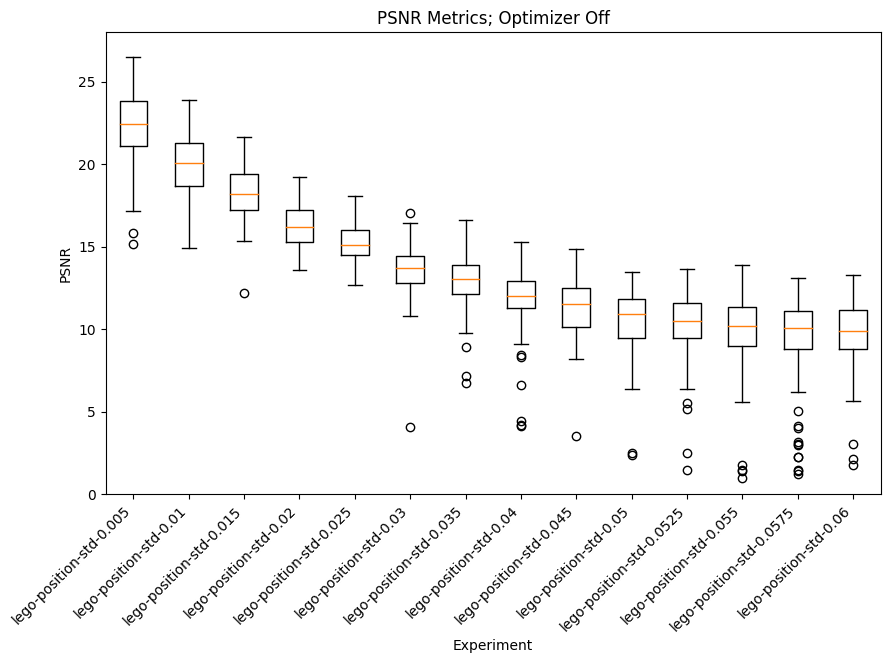

In [6]:
import matplotlib.pyplot as plt

# Extract the PSNR values and names from the metrics
psnr_values = [metric['PSNR'] for metric in all_runs_metrics]
names = [metric['name'] for metric in all_runs_metrics]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(psnr_values, labels=names)
plt.ylim(0, 28)  # Set y-axis limits
plt.xlabel('Experiment')
plt.ylabel('PSNR')
plt.title('PSNR Metrics; Optimizer Off')
# plt.xticks(rotation=90)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()
#Rotate the x-axis labels

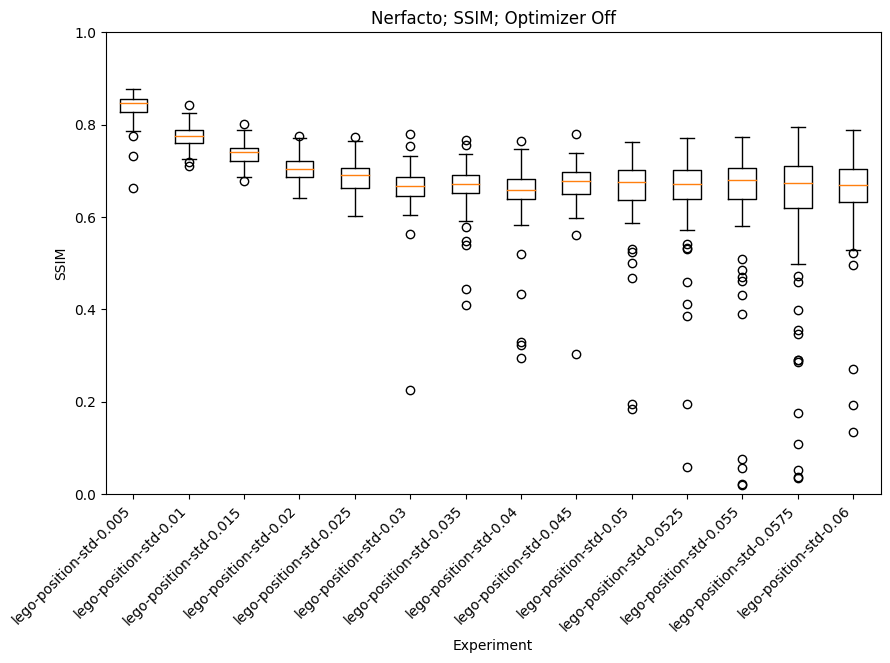

In [11]:
import matplotlib.pyplot as plt

# Extract the PSNR values and names from the metrics
ssim_values = [metric['SSIM'] for metric in all_runs_metrics]
names = [metric['name'] for metric in all_runs_metrics]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(ssim_values, labels=names)
plt.ylim(0.0, 1)  # Set y-axis limits
plt.xlabel('Experiment')
plt.ylabel('SSIM')
plt.title('Nerfacto; SSIM; Optimizer Off')
# plt.xticks(rotation=90)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()
#Rotate the x-axis labels

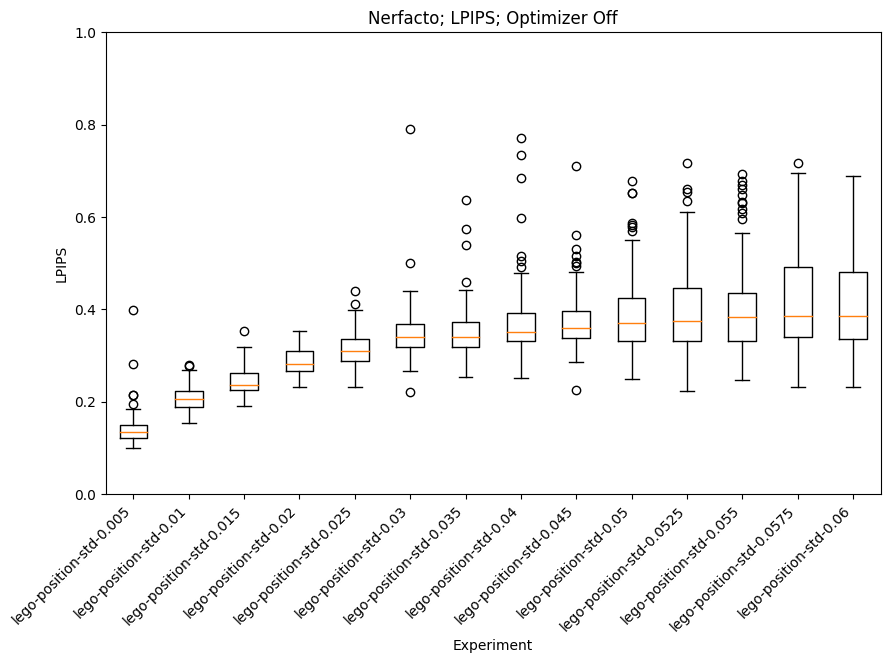

In [12]:
import matplotlib.pyplot as plt

# Extract the PSNR values and names from the metrics
LPIPS_values = [metric['LPIPS'] for metric in all_runs_metrics]
names = [metric['name'] for metric in all_runs_metrics]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(LPIPS_values, labels=names)
plt.ylim(0, 1)  # Set y-axis limits
plt.xlabel('Experiment')
plt.ylabel('LPIPS')
plt.title('Nerfacto; LPIPS; Optimizer Off')
# plt.xticks(rotation=90)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()
#Rotate the x-axis labels

In [15]:
psnrs, lpips_vals, ssims = [], [], []

def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return ToTensor()(image)


all_runs_metrics_opt_on = []

import os

jsons_folder = "C:\Stuff\Results\jsons_nerfacto_lego_opt_on"
renders_folder = "C:\Stuff\Results\renders_nerfacto_lego_opt_on"

for filename in os.listdir(jsons_folder):
    if filename.endswith(".json") and 'position' in filename:
        json_filename = filename
        json_path = os.path.join(jsons_folder, filename)
        timestamp = get_timestamp(json_path)

        run_path = os.path.join(PATH_RENDERS, timestamp)
        print(run_path)
        if os.path.isdir(run_path):
            psnrs, lpips_vals, ssims = [], [], []

            for filename in os.listdir(run_path):
                if filename.endswith('img.jpg') and not filename.startswith('crop_degrated_'):
                    base_name = filename.split('-')[0]
                    degraded_filename = f'crop_degrated_{base_name}-img.jpg'
                    degraded_filepath = os.path.join(run_path, degraded_filename)

                    degraded_image = load_image(degraded_filepath)
                    original_image = load_image(os.path.join(PATH_ORIGINAL_IMAGES, base_name + '-img.jpg'))

                    original_image = original_image.unsqueeze(0)  # Add batch dimension
                    degraded_image = degraded_image.unsqueeze(0)  # Add batch dimension

                    psnr = psnr_metric(original_image, degraded_image)
                    ssim = ssim_metric(original_image, degraded_image)
                    lpips = lpips_metric(original_image, degraded_image)
                    psnrs.append(psnr.item())
                    ssims.append(ssim.item())
                    lpips_vals.append(lpips.item()) 
            print(run_path)
            all_runs_metrics_opt_on.append({
                'name': json_filename[:-5],
                'run': timestamp,
                'PSNR': psnrs,
                'SSIM': ssims,
                'LPIPS': lpips_vals
            })
for run_metrics in all_runs_metrics_opt_on:
    print(f"Metrics for run {run_metrics['run']}:")
    print(f"Name {run_metrics['name']}:")
    print("PSNR values:", run_metrics['PSNR'])
    print("SSIM values:", run_metrics['SSIM'])
    print("LPIPS values:", run_metrics['LPIPS'])
    print("\n")

C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_025638


c:\Users\danko\miniconda3\envs\nerfstudio\lib\site-packages\torchmetrics\utilities\prints.py:70: FutureWarning: Importing `spectral_angle_mapper` from `torchmetrics.functional` was deprecated and will be removed in 2.0. Import `spectral_angle_mapper` from `torchmetrics.image` instead.
  _future_warning(


C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_025638
C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_030944
C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_030944
C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_032251
C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_032251
C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_033557
C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_033557
C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_034902
C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_034902
C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_040213
C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_040213
C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_041518
C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_041518
C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_042827
C:\Stuff\Results\renders_nerfacto_lego_opt_on\2024-03-03_042827
C:\Stuff\Results\renders_nerfacto_lego_o

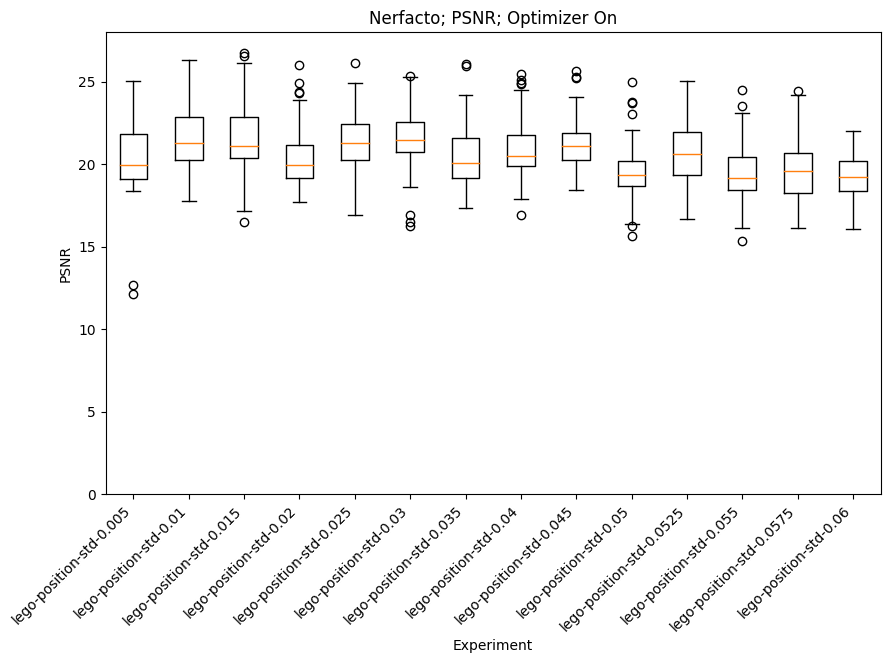

In [16]:
import matplotlib.pyplot as plt

# Extract the PSNR values and names from the metrics
psnr_values = [metric['PSNR'] for metric in all_runs_metrics_opt_on]
names = [metric['name'] for metric in all_runs_metrics_opt_on]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(psnr_values, labels=names)
plt.ylim(0, 28)  # Set y-axis limits
plt.xlabel('Experiment')
plt.ylabel('PSNR')
plt.title('Nerfacto; PSNR; Optimizer On')
# plt.xticks(rotation=90)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()
#Rotate the x-axis labels

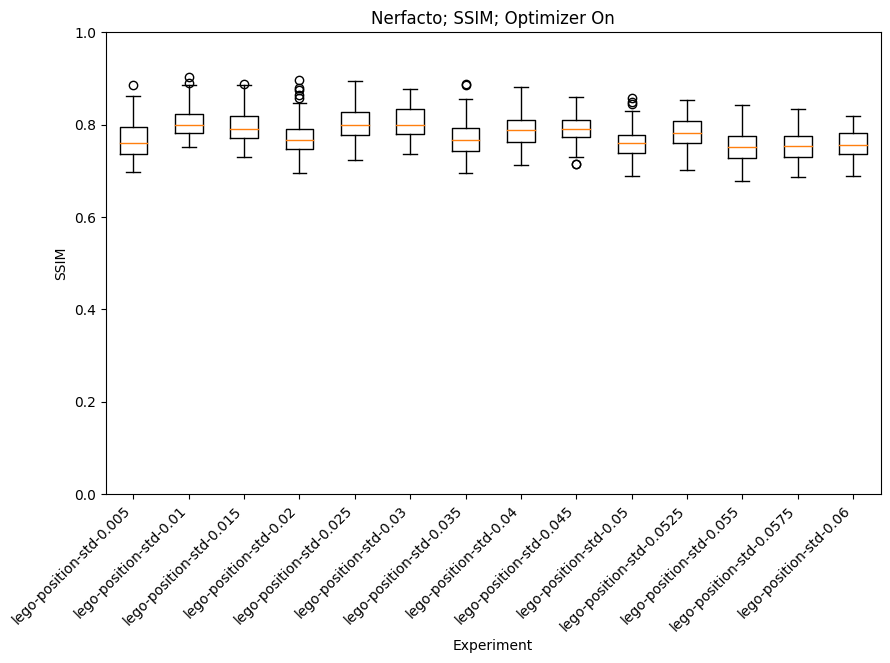

In [17]:
import matplotlib.pyplot as plt

# Extract the PSNR values and names from the metrics
ssim_values = [metric['SSIM'] for metric in all_runs_metrics_opt_on]
names = [metric['name'] for metric in all_runs_metrics_opt_on]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(ssim_values, labels=names)
plt.ylim(0.0, 1)  # Set y-axis limits
plt.xlabel('Experiment')
plt.ylabel('SSIM')
plt.title('Nerfacto; SSIM; Optimizer On')
# plt.xticks(rotation=90)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()
#Rotate the x-axis labels

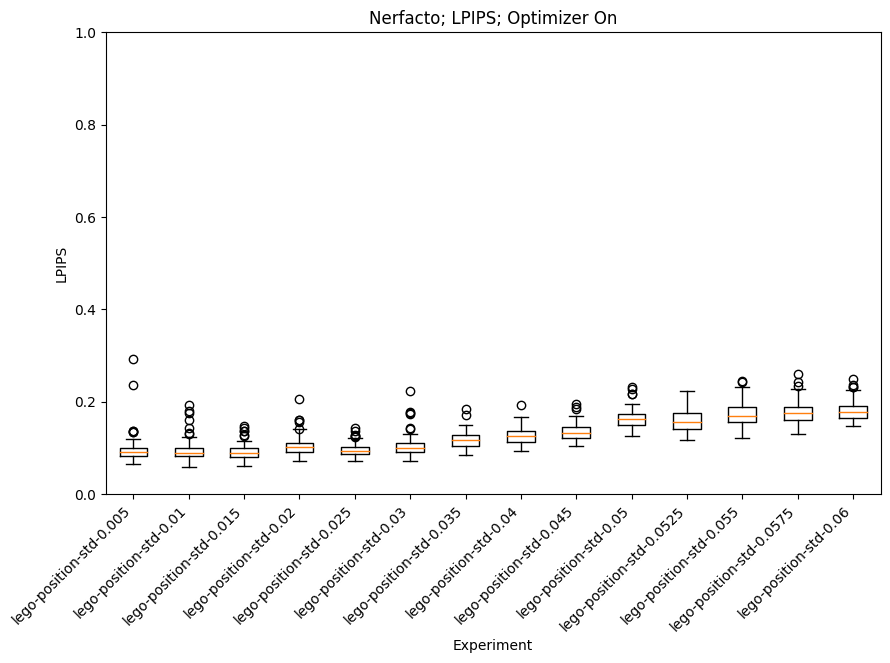

In [18]:
import matplotlib.pyplot as plt

# Extract the PSNR values and names from the metrics
LPIPS_values = [metric['LPIPS'] for metric in all_runs_metrics_opt_on]
names = [metric['name'] for metric in all_runs_metrics_opt_on]

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(LPIPS_values, labels=names)
plt.ylim(0, 1.0)  # Set y-axis limits
plt.xlabel('Experiment')
plt.ylabel('LPIPS')
plt.title('Nerfacto; LPIPS; Optimizer On')
# plt.xticks(rotation=90)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()
#Rotate the x-axis labels

In [124]:
all_runs_metrics_opt_on[0]

{'name': 'lego-position-std-0.005',
 'run': '2024-03-02_213015',
 'PSNR': [21.16167449951172,
  24.729951858520508,
  24.743995666503906,
  21.49855613708496,
  21.745695114135742,
  21.98468017578125,
  20.756261825561523,
  23.203845977783203,
  21.959360122680664,
  25.114194869995117,
  20.70698356628418,
  23.059314727783203,
  21.422649383544922,
  21.81069564819336,
  22.18958282470703,
  15.84165096282959,
  23.277782440185547,
  24.066709518432617,
  23.83527183532715,
  23.21270179748535,
  19.7668514251709,
  19.61404800415039,
  24.15223503112793,
  19.373287200927734,
  23.65416717529297,
  23.282421112060547,
  21.085895538330078,
  22.898801803588867,
  23.605215072631836,
  23.847076416015625,
  18.181554794311523,
  20.71404266357422,
  22.65319061279297,
  24.39472007751465,
  25.32669448852539,
  23.13880729675293,
  22.36086654663086,
  24.077136993408203,
  24.518281936645508,
  25.992046356201172,
  23.700407028198242,
  20.232627868652344,
  20.18913459777832,
  

In [19]:
def create_positions(length):
    positions = []
    current_position = 1
    for _ in range(length):
        positions.append(current_position)
        positions.append(current_position + 1)
        current_position += 3  # Skipping one position after every pair for spacing
    return positions

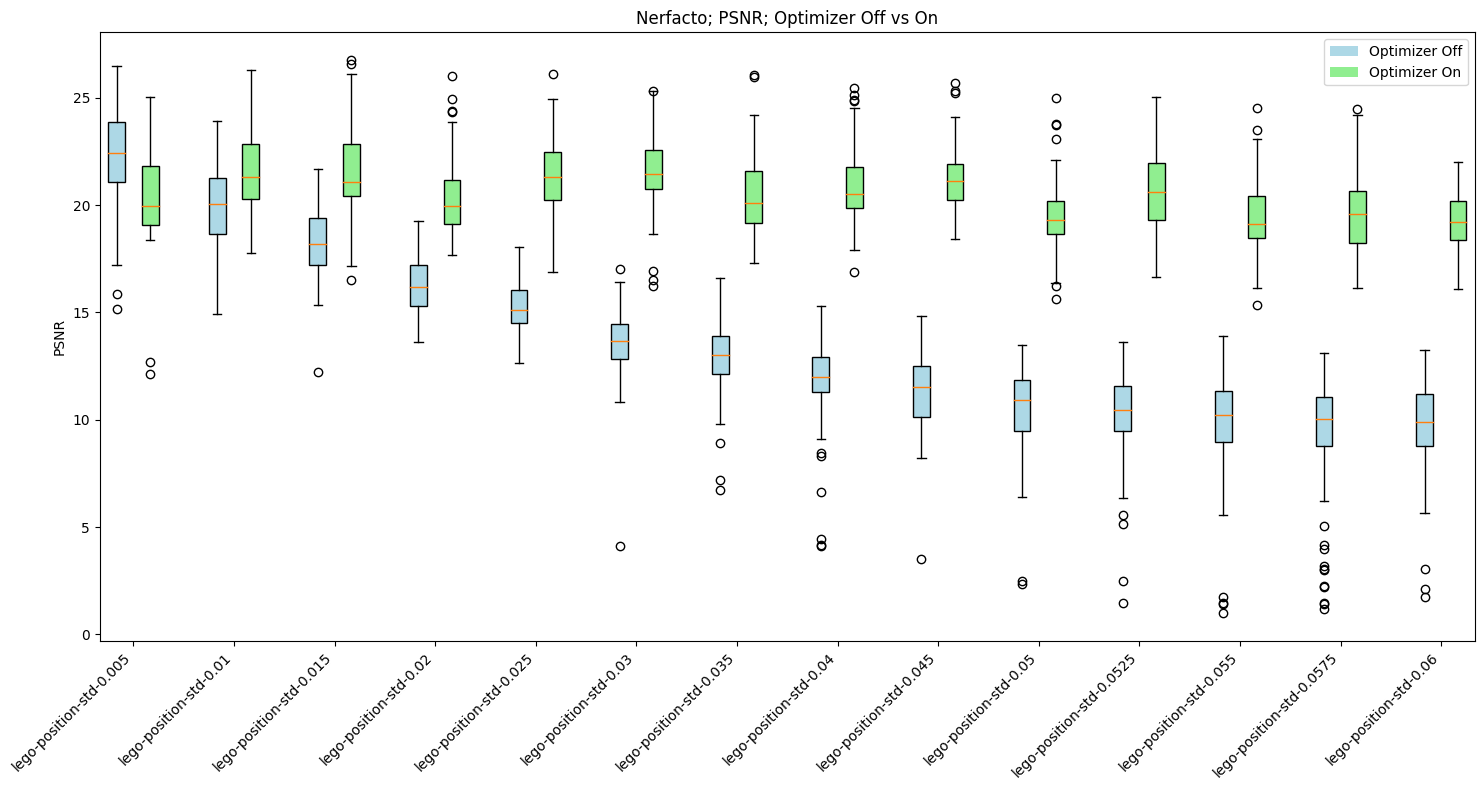

In [20]:
import numpy as np
data = [metric['PSNR'] for metric in all_runs_metrics]
noisy_data = psnr_values = [metric['PSNR'] for metric in all_runs_metrics_opt_on]
names = [metric['name'] for metric in all_runs_metrics_opt_on]
# Adjusting the data to have two boxplots for each label on one plot

# Combine original and noisy data for side-by-side comparison
combined_data = []
for original, noisy in zip(data, noisy_data):
    combined_data.append(original)
    combined_data.append(noisy)

# Position adjustments for side-by-side boxplots
positions = create_positions(len(data))
colors = ['lightblue', 'lightgreen'] * len(names)

# Creating a single figure for the combined boxplots
fig, ax = plt.subplots(figsize=(15, 8))
# ax.boxplot(combined_data, positions=positions)
box = ax.boxplot(combined_data, positions=positions, patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

from matplotlib.patches import Patch    
legend_elements = [Patch(facecolor='lightblue', label='Optimizer Off'),
                   Patch(facecolor='lightgreen', label='Optimizer On')]

ax.legend(handles=legend_elements, loc='upper right')    
# Customizing the x-axis labels to indicate original and noisy data for each label
tick_positions = [np.mean([positions[i], positions[i + 1]]) for i in range(0, len(positions), 2)]
ax.set_xticks(tick_positions)
ax.set_xticklabels(names, rotation=45, ha='right')
ax.set_title('Nerfacto; PSNR; Optimizer Off vs On')

ax.set_ylabel('PSNR')

plt.tight_layout()
plt.show()


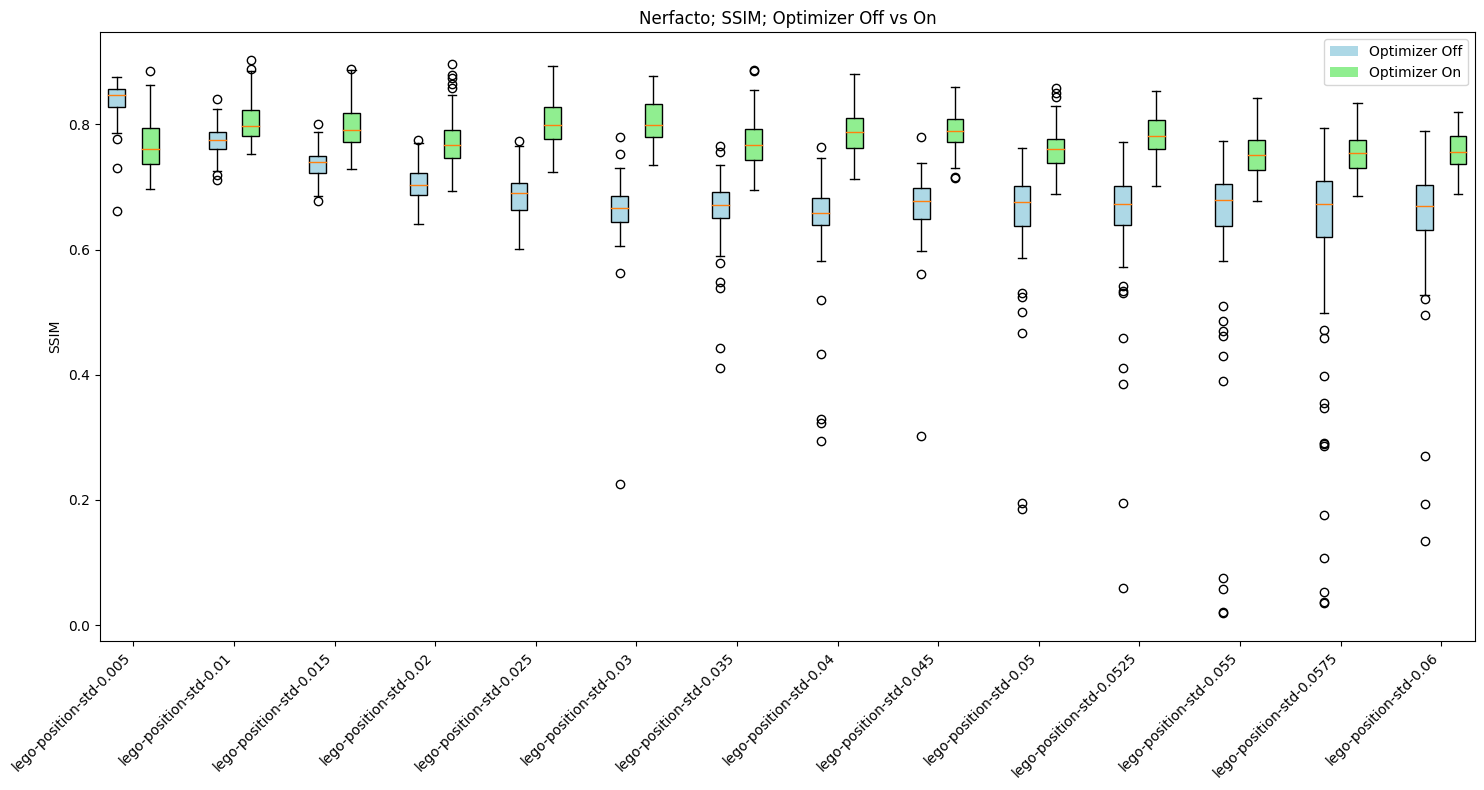

In [21]:
import numpy as np
data = [metric['SSIM'] for metric in all_runs_metrics]
noisy_data = [metric['SSIM'] for metric in all_runs_metrics_opt_on]
names = [metric['name'] for metric in all_runs_metrics_opt_on]
# Adjusting the data to have two boxplots for each label on one plot

# Combine original and noisy data for side-by-side comparison
combined_data = []
for original, noisy in zip(data, noisy_data):
    combined_data.append(original)
    combined_data.append(noisy)

# Position adjustments for side-by-side boxplots
positions = create_positions(len(data))
colors = ['lightblue', 'lightgreen'] * len(names)

# Creating a single figure for the combined boxplots
fig, ax = plt.subplots(figsize=(15, 8))
# ax.boxplot(combined_data, positions=positions)
box = ax.boxplot(combined_data, positions=positions, patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

from matplotlib.patches import Patch    
legend_elements = [Patch(facecolor='lightblue', label='Optimizer Off'),
                   Patch(facecolor='lightgreen', label='Optimizer On')]

ax.legend(handles=legend_elements, loc='upper right')    
# Customizing the x-axis labels to indicate original and noisy data for each label
tick_positions = [np.mean([positions[i], positions[i + 1]]) for i in range(0, len(positions), 2)]
ax.set_xticks(tick_positions)
ax.set_xticklabels(names, rotation=45, ha='right')
ax.set_title('Nerfacto; SSIM; Optimizer Off vs On')

ax.set_ylabel('SSIM')

plt.tight_layout()
plt.show()


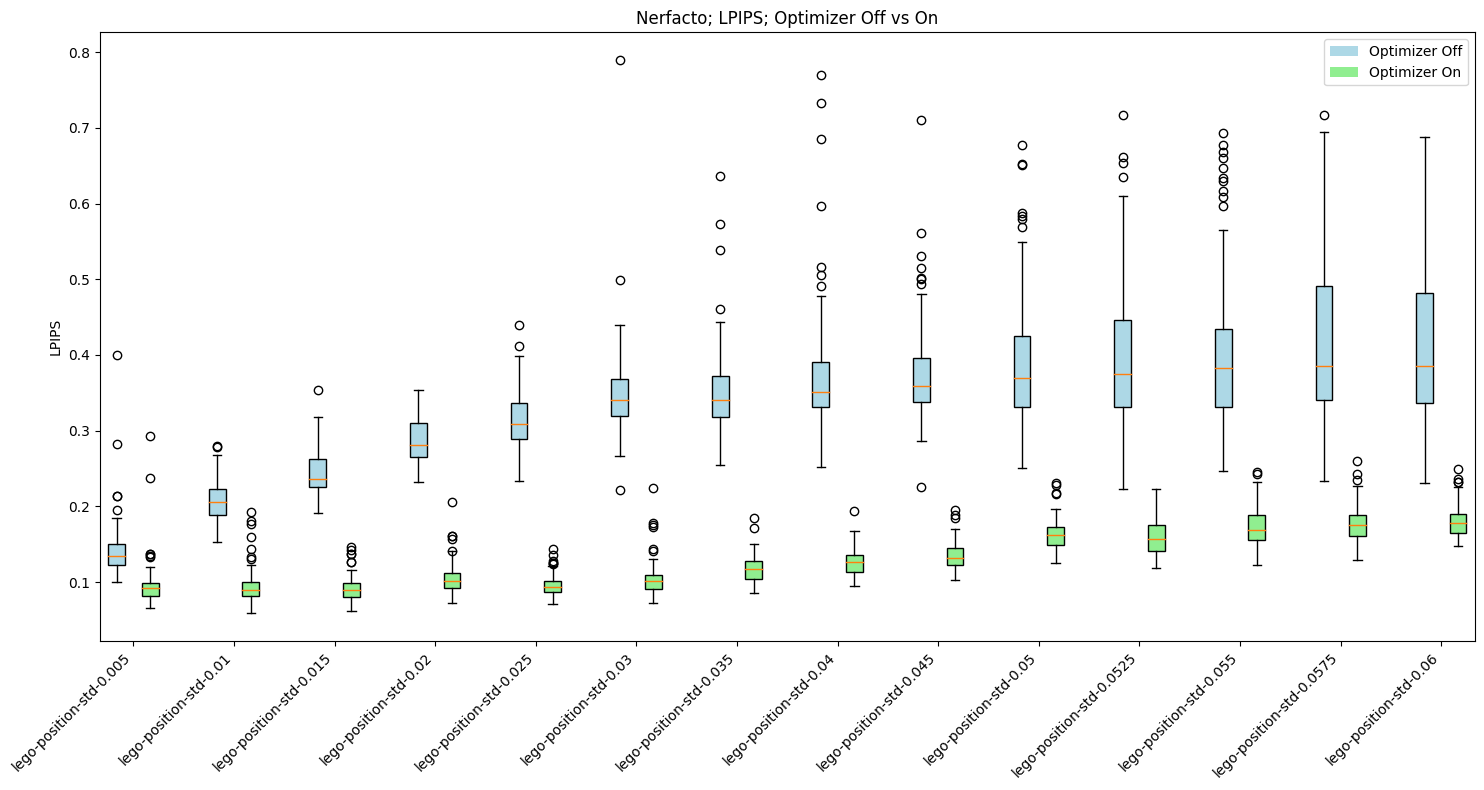

In [22]:
import numpy as np
data = [metric['LPIPS'] for metric in all_runs_metrics]
noisy_data = [metric['LPIPS'] for metric in all_runs_metrics_opt_on]
names = [metric['name'] for metric in all_runs_metrics_opt_on]
# Adjusting the data to have two boxplots for each label on one plot

# Combine original and noisy data for side-by-side comparison
combined_data = []
for original, noisy in zip(data, noisy_data):
    combined_data.append(original)
    combined_data.append(noisy)

# Position adjustments for side-by-side boxplots
positions = create_positions(len(data))
colors = ['lightblue', 'lightgreen'] * len(names)

# Creating a single figure for the combined boxplots
fig, ax = plt.subplots(figsize=(15, 8))
# ax.boxplot(combined_data, positions=positions)
box = ax.boxplot(combined_data, positions=positions, patch_artist=True)

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

from matplotlib.patches import Patch    
legend_elements = [Patch(facecolor='lightblue', label='Optimizer Off'),
                   Patch(facecolor='lightgreen', label='Optimizer On')]

ax.legend(handles=legend_elements, loc='upper right')    
# Customizing the x-axis labels to indicate original and noisy data for each label
tick_positions = [np.mean([positions[i], positions[i + 1]]) for i in range(0, len(positions), 2)]
ax.set_xticks(tick_positions)
ax.set_xticklabels(names, rotation=45, ha='right')
ax.set_title('Nerfacto; LPIPS; Optimizer Off vs On')

ax.set_ylabel('LPIPS')

plt.tight_layout()
plt.show()
